# Exit Test

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### Read the dataset into python environment

In [2]:
employee=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\DSA\Exit test\Employee.csv")
pd.set_option('display.max_columns',None)
employee

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,Yes,40,Associate Degree,Single,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,Yes,45,Master’s Degree,Married,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,No,4,Associate Degree,Married,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,No,13,Bachelor’s Degree,Divorced,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


# Exploratory Data Analysis

### Check basic information

In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

***Dataset has 24 features and 74498 entries. Among that, 8 features are numerical (2 float and 6 integer) and 16 are categorical features.***

### Check statistical summary

In [4]:
employee.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


### Check for unique values

In [5]:
(employee.nunique()).sort_values(ascending=False)

Employee ID                 74498
Monthly Income               9842
Company Tenure                127
Distance from Home             99
Years at Company               51
Age                            42
Number of Dependents            7
Number of Promotions            5
Education Level                 5
Job Role                        5
Performance Rating              4
Job Satisfaction                4
Work-Life Balance               4
Company Reputation              4
Employee Recognition            4
Marital Status                  3
Job Level                       3
Company Size                    3
Overtime                        2
Gender                          2
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Attrition                       2
dtype: int64

***Feature 'Employee ID' has full of unique values.***

### Check for duplicates

In [6]:
employee.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

### Check for null values 

In [7]:
employee.isnull().sum().sort_values(ascending=False)

Number of Dependents        6
Education Level             5
Number of Promotions        5
Job Level                   5
Work-Life Balance           4
Performance Rating          4
Marital Status              4
Remote Work                 3
Employee Recognition        2
Company Size                2
Company Reputation          0
Innovation Opportunities    0
Leadership Opportunities    0
Company Tenure              0
Employee ID                 0
Age                         0
Distance from Home          0
Overtime                    0
Job Satisfaction            0
Monthly Income              0
Job Role                    0
Years at Company            0
Gender                      0
Attrition                   0
dtype: int64

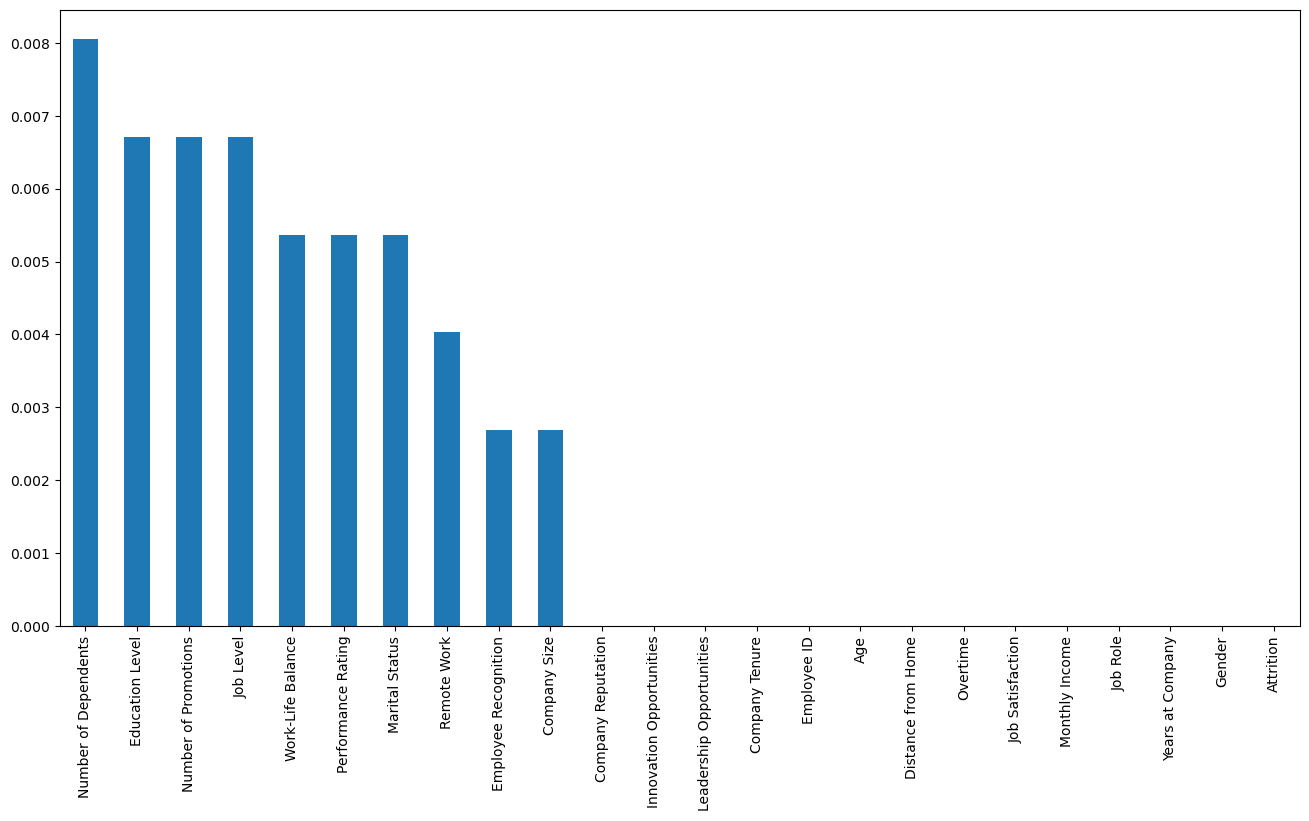

In [8]:
plt.figure(figsize=(16, 8))
(((employee.isnull().sum()/len(employee))*100).sort_values(ascending=False)).plot(kind='bar')
plt.show()

***10 features out of 24 have null values (Less than 1% only).***

### Check for outliers

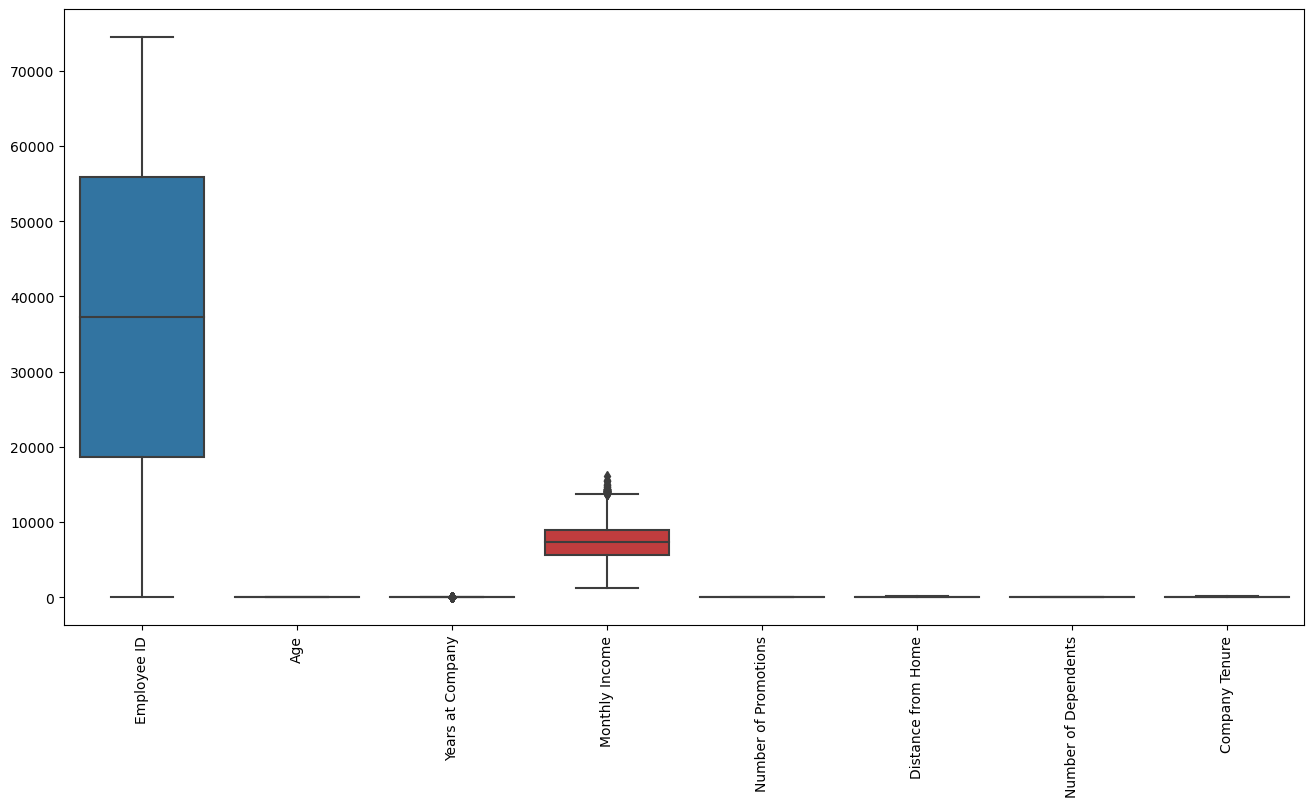

In [9]:
plt.figure(figsize=(16, 8))
sns.boxplot(employee)
plt.xticks(rotation=90)
plt.show()

***Outliers are present in only 2 no. of features.***

### Distribution of features

Add percentages on top of bars

In [10]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)

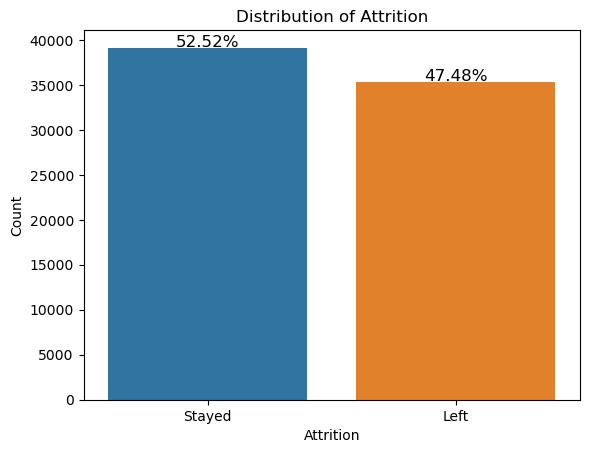

In [11]:
ax=sns.countplot(x='Attrition',data=employee)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Attrition'], 0,80,12)
plt.show()

***Inference : Target variable 'Attrition' is not imbalanced. 53% employees stayed and 47% employees left the company.***

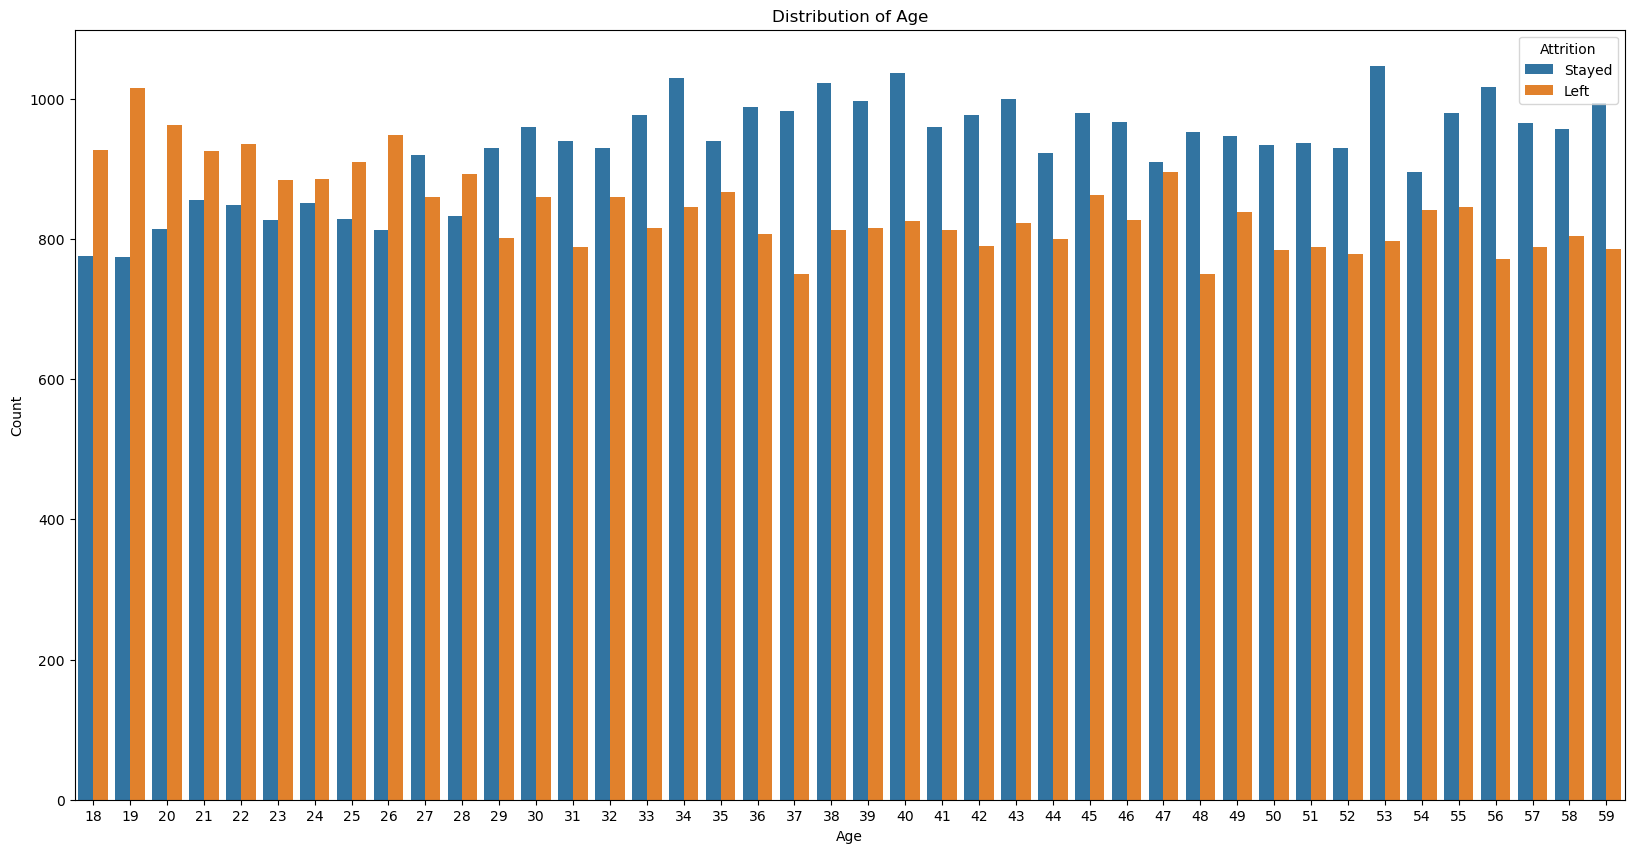

In [12]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='Age',data=employee,hue='Attrition')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

***Inference : 'Age' feature is almost uniformly distributed. Company has almost equal no. of employees from age 18 to age 59. Attrition is more among young aged employees.***

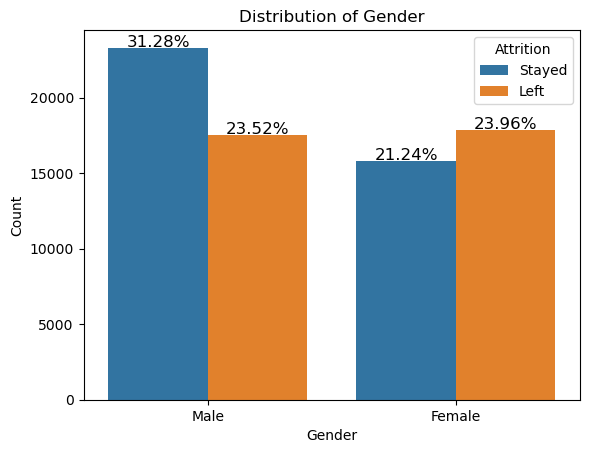

In [13]:
ax=sns.countplot(x='Gender',data=employee,hue='Attrition')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Gender'], 0,80,12)
plt.show()

***Inference : Feature 'Gender' is not highly imbalanced. 55% employees are male whreas 45% employees are female. Attrition pattern is alike in both male and female employees.***

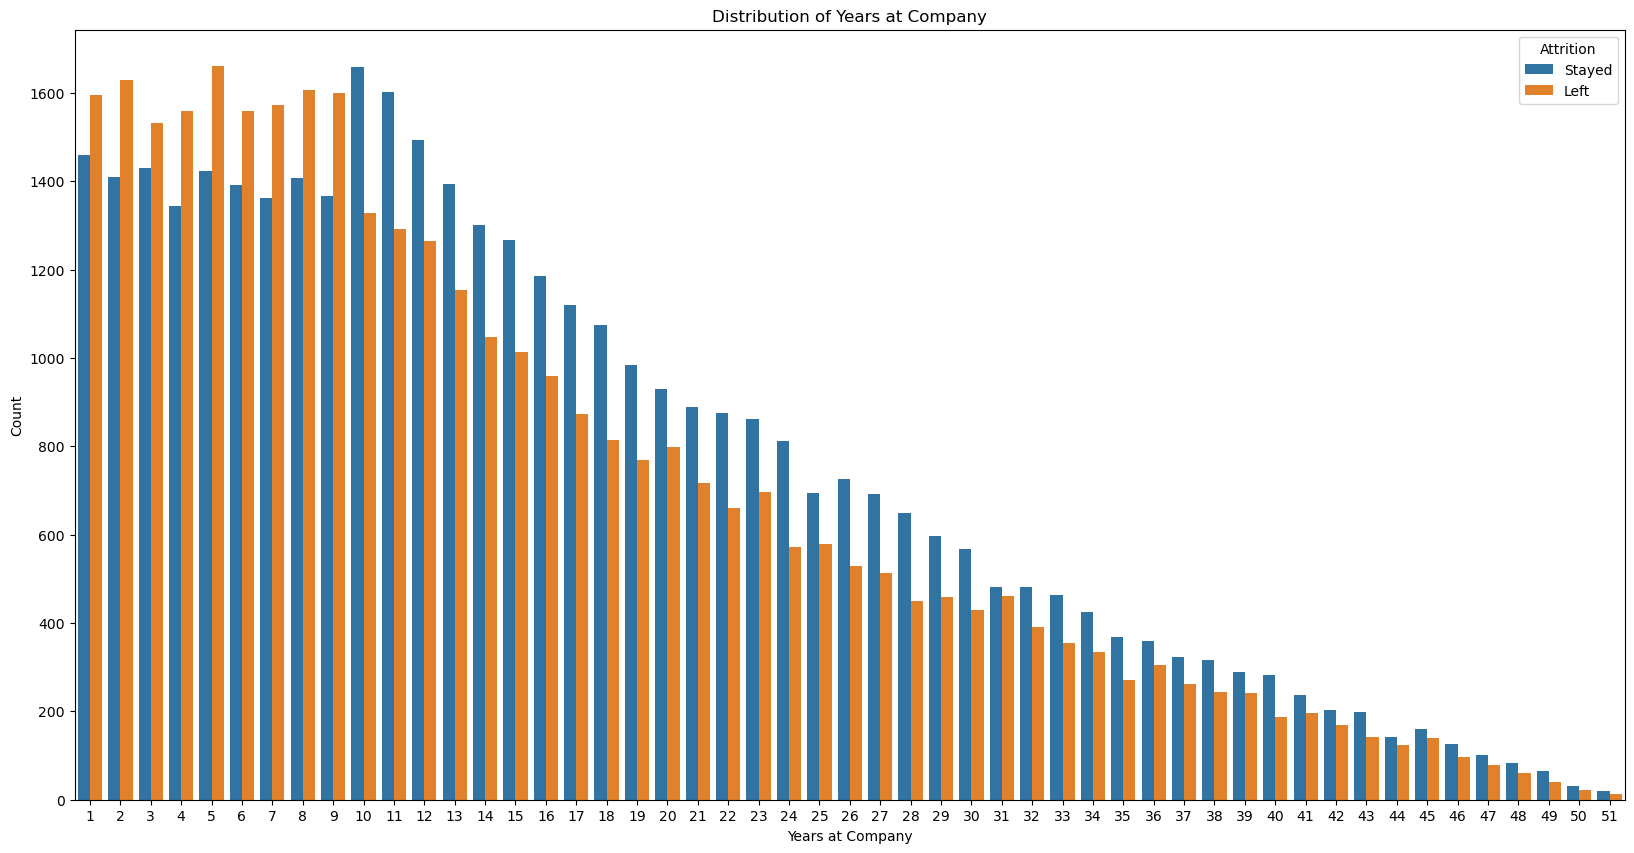

In [14]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='Years at Company',data=employee,hue='Attrition')
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

***Inference : Most of the employees are new in company whereas only very few no. of employees have more than 50 years experience. New employees has more attrition rate than other.***

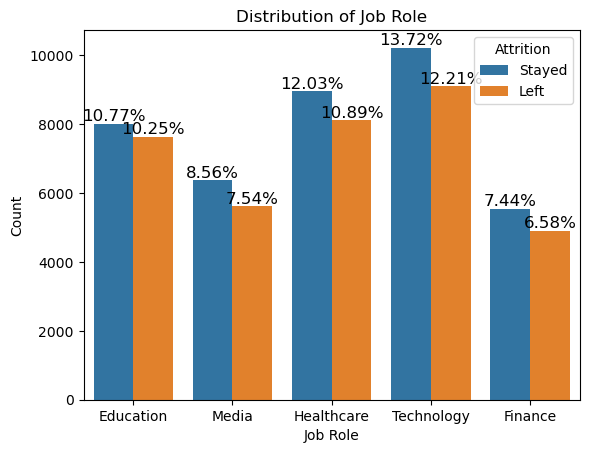

In [15]:
ax=sns.countplot(x='Job Role',data=employee,hue='Attrition')
plt.title('Distribution of Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Job Role'], 0,80,12)
plt.show()

***Inference : Most of the employees are from technology department and less no. of employees are from finance department.***

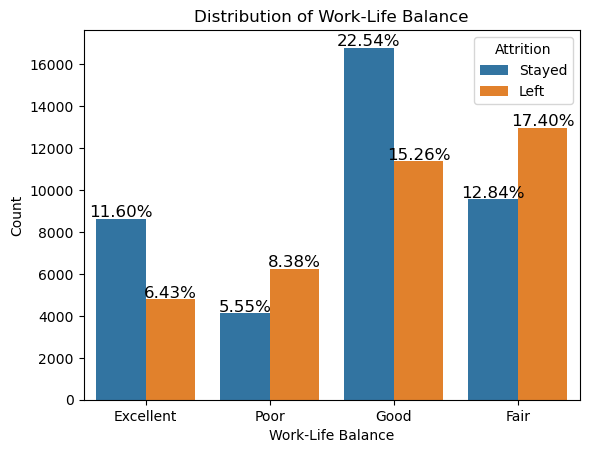

In [16]:
ax=sns.countplot(x='Work-Life Balance',data=employee,hue='Attrition')
plt.title('Distribution of Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Work-Life Balance'], 0,80,12)
plt.show()

***Inference : Work life balance of most of the employees are good, then fair and then excellent. And very few no. of employees work life balance is poor. Employees from poor and fair left the companies more than staying.***

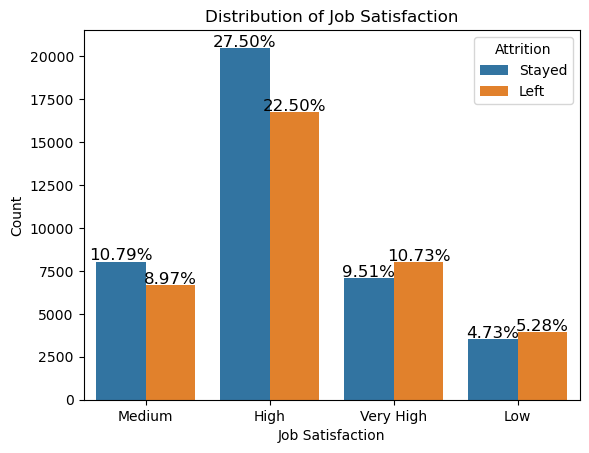

In [17]:
ax=sns.countplot(x='Job Satisfaction',data=employee,hue='Attrition')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Job Satisfaction'], 0,80,12)
plt.show()

***Inference : Majority no. of employees are highly satisfied in their job whereas a very few employees satisfaction is low. Employees with low job statisfaction and very high job statisfaction left the companies more than staying.***

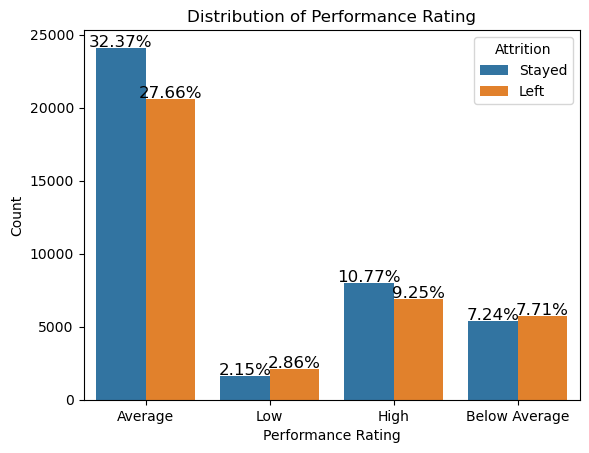

In [18]:
ax=sns.countplot(x='Performance Rating',data=employee,hue='Attrition')
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Performance Rating'], 0,80,12)
plt.show()

***Inference : Majority no. of employees are rated with an average performance whereas a very few employees performance rating is low. Employees who have low performance rating left the companies more.***

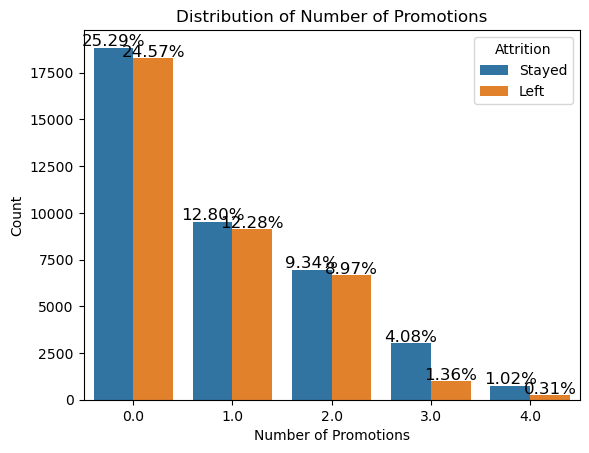

In [19]:
ax=sns.countplot(x='Number of Promotions',data=employee,hue='Attrition')
plt.title('Distribution of Number of Promotions')
plt.xlabel('Number of Promotions')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Number of Promotions'], 0,80,12)
plt.show()

***Inference : 50% of employees didnot get any promotion whereas only 1% employees got 4 no. of promotions.***

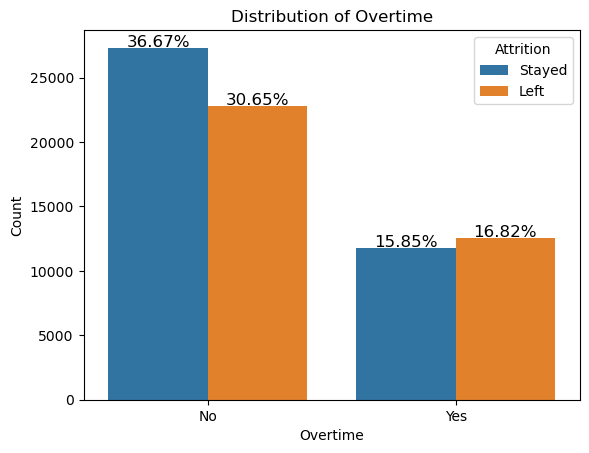

In [20]:
ax=sns.countplot(x='Overtime',data=employee,hue='Attrition')
plt.title('Distribution of Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Overtime'], 0,80,12)
plt.show()

***Inference : 50% of employees didnot get any promotion whereas only 1% employees got 4 no. of promotions.***

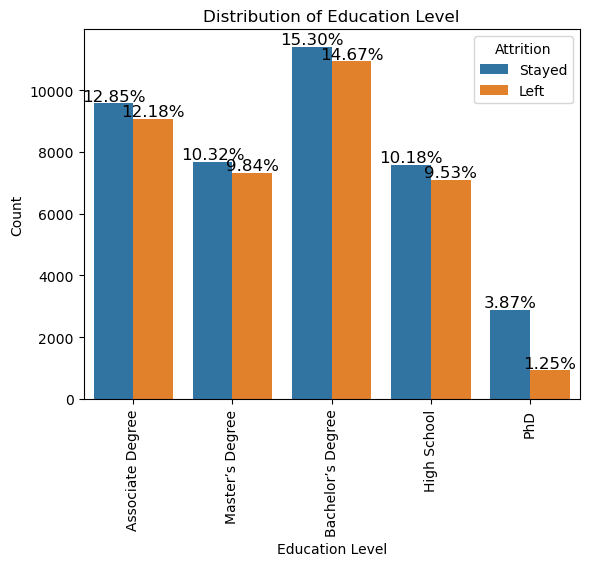

In [21]:
ax=sns.countplot(x='Education Level',data=employee,hue='Attrition')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
percentage_without_hue(ax, employee['Education Level'], 0,80,12)
plt.show()

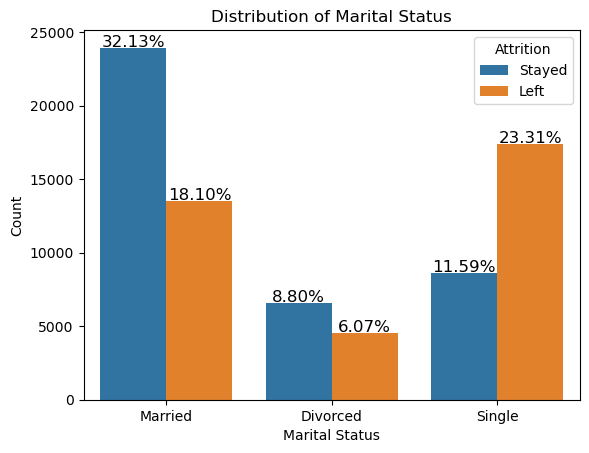

In [22]:
ax=sns.countplot(x='Marital Status',data=employee,hue='Attrition')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Marital Status'], 0,80,12)
plt.show()

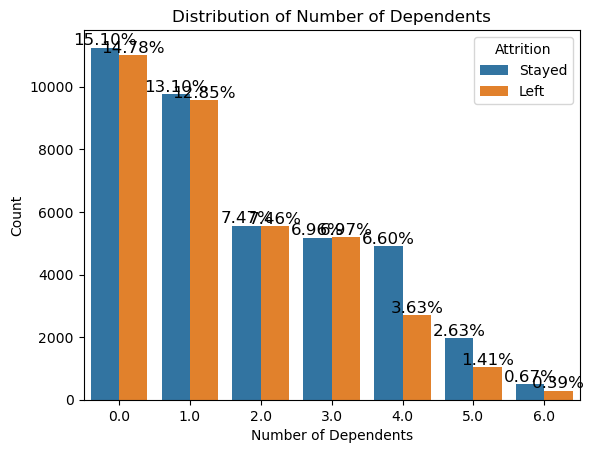

In [23]:
ax=sns.countplot(x='Number of Dependents',data=employee,hue='Attrition')
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Number of Dependents'], 0,80,12)
plt.show()

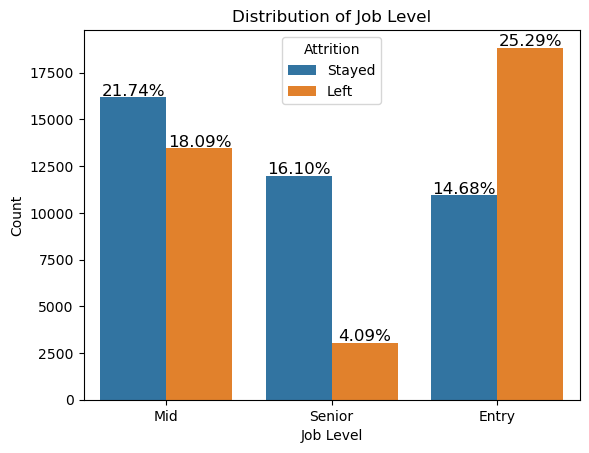

In [24]:
ax=sns.countplot(x='Job Level',data=employee,hue='Attrition')
plt.title('Distribution of Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Job Level'], 0,80,12)
plt.show()

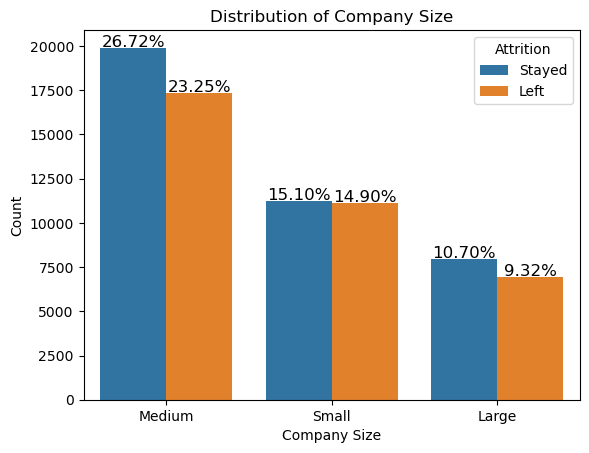

In [25]:
ax=sns.countplot(x='Company Size',data=employee,hue='Attrition')
plt.title('Distribution of Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Company Size'], 0,80,12)
plt.show()

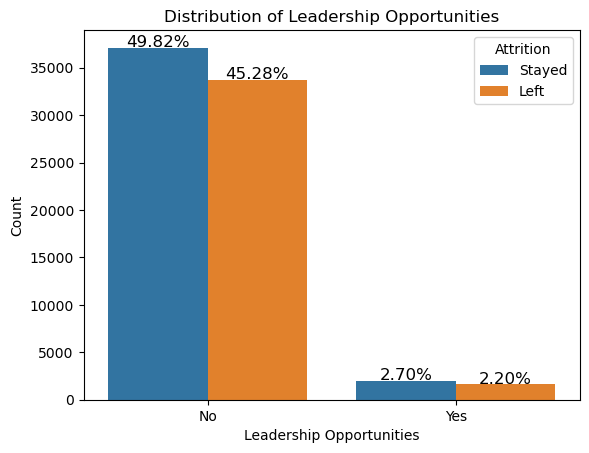

In [26]:
ax=sns.countplot(x='Leadership Opportunities',data=employee,hue='Attrition')
plt.title('Distribution of Leadership Opportunities')
plt.xlabel('Leadership Opportunities')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Leadership Opportunities'], 0,80,12)
plt.show()

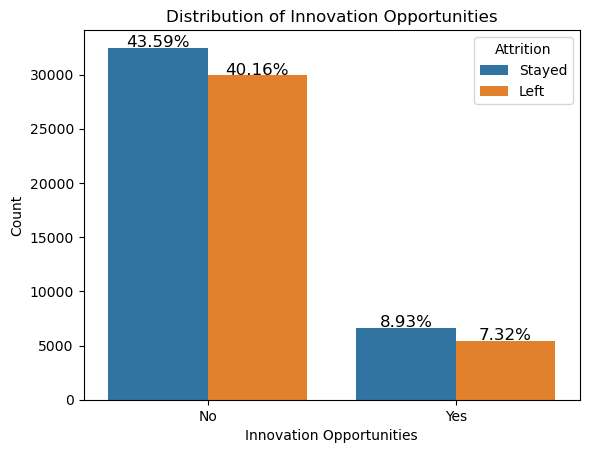

In [27]:
ax=sns.countplot(x='Innovation Opportunities',data=employee,hue='Attrition')
plt.title('Distribution of Innovation Opportunities')
plt.xlabel('Innovation Opportunities')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Innovation Opportunities'], 0,80,12)
plt.show()

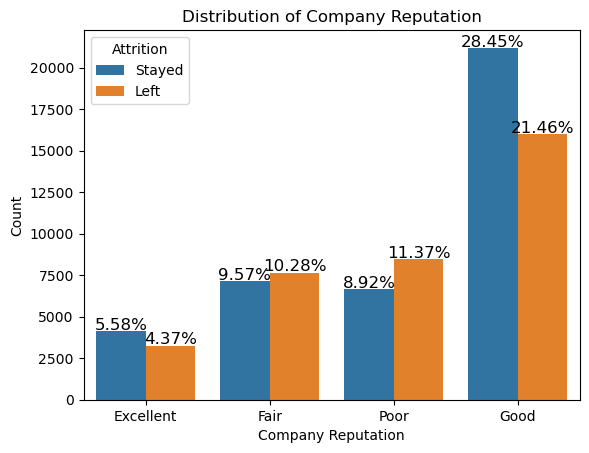

In [28]:
ax=sns.countplot(x='Company Reputation',data=employee,hue='Attrition')
plt.title('Distribution of Company Reputation')
plt.xlabel('Company Reputation')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Company Reputation'], 0,80,12)
plt.show()

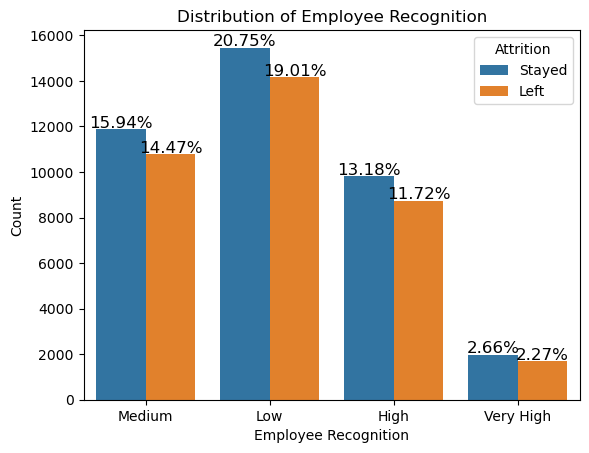

In [29]:
ax=sns.countplot(x='Employee Recognition',data=employee,hue='Attrition')
plt.title('Distribution of Employee Recognition')
plt.xlabel('Employee Recognition')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Employee Recognition'], 0,80,12)
plt.show()

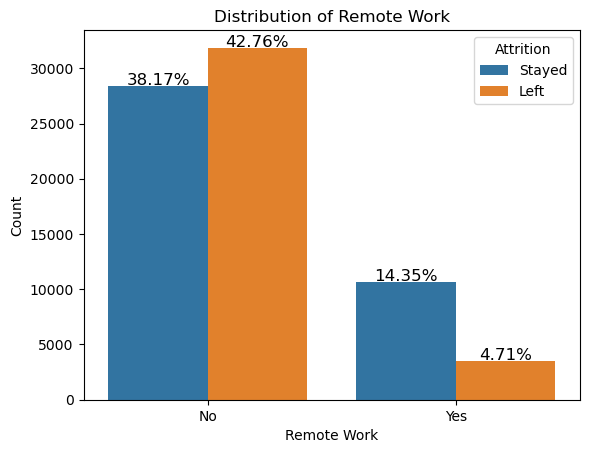

In [30]:
ax=sns.countplot(x='Remote Work',data=employee,hue='Attrition')
plt.title('Distribution of Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Count')
percentage_without_hue(ax, employee['Remote Work'], 0,80,12)
plt.show()

***Inference : Attrition is less in employees under remote work than office work.***

## Correlation

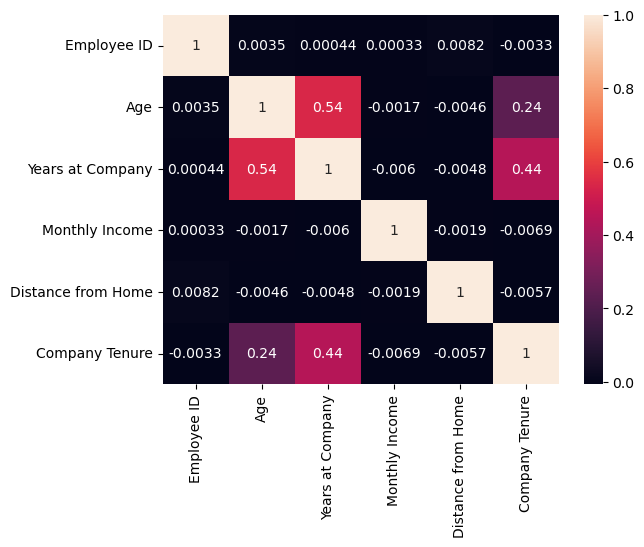

In [31]:
sns.heatmap(employee.select_dtypes('int64','float64').corr(),annot=True)
plt.show()

***Inference : There are no features having correlation value greatre than 0.6. So there is no high linear relationship between any of 2 features.***

# Data Pre - Processing

### Check for null values

In [32]:
employee.isnull().sum().sort_values(ascending=False)

Number of Dependents        6
Education Level             5
Number of Promotions        5
Job Level                   5
Work-Life Balance           4
Performance Rating          4
Marital Status              4
Remote Work                 3
Employee Recognition        2
Company Size                2
Company Reputation          0
Innovation Opportunities    0
Leadership Opportunities    0
Company Tenure              0
Employee ID                 0
Age                         0
Distance from Home          0
Overtime                    0
Job Satisfaction            0
Monthly Income              0
Job Role                    0
Years at Company            0
Gender                      0
Attrition                   0
dtype: int64

***All the 10 features with missing values have only less than 1% missing values. Also 8 among them are categorical features. So use corresponding mode for null value imputation. For the remaining two numerical features also,('Number of Promotions' and 'Number of Dependents') we can use the corresponding mode itself for treating the null values.***

### Null value imputation

In [33]:
null_value_columns=['Work-Life Balance','Performance Rating','Number of Promotions','Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Remote Work','Employee Recognition']
for item in null_value_columns:
    employee[item]=employee[item].fillna(value=employee[item].mode()[0])

### Check again for null values

In [34]:
employee.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

***All null values are imputed properly.***

### Outlier Treatment

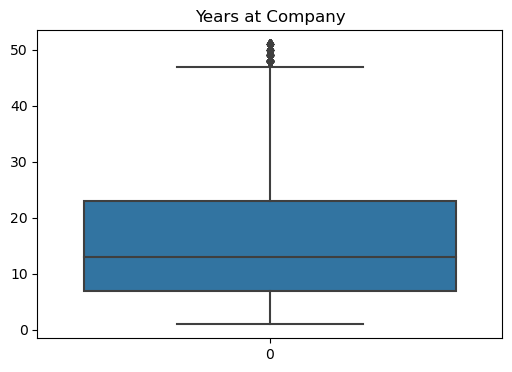

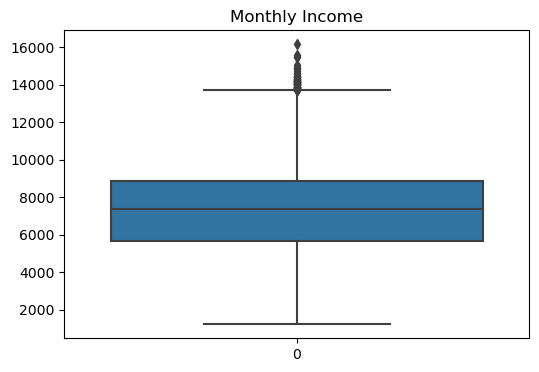

In [35]:
outlier_columns=['Years at Company','Monthly Income']
for i in outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(employee[i])
    plt.title(i)
    plt.show()

***Outliers are present above upper whisker only.***

In [36]:
for i in outlier_columns:
    print('Skewness of feature',i,':',employee[i].skew())

Skewness of feature Years at Company : 0.7899082019432808
Skewness of feature Monthly Income : 0.11831228795852874


***Feature 'Years at Company' is moderately skewed whereas feature 'Monthly Income' has almost symmetric distribution. So use IQR method for outlier detection and clip function for outlier treatment.***

In [37]:
for i in outlier_columns:    
    Q1=np.percentile(employee[i],25,method='midpoint')
    Q3=np.percentile(employee[i],75,method='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in employee[i]:
        if (j > up_lim):
            outliers.append(j)    
    employee[i]=employee[i].clip(upper=up_lim) 

### Check again for outliers

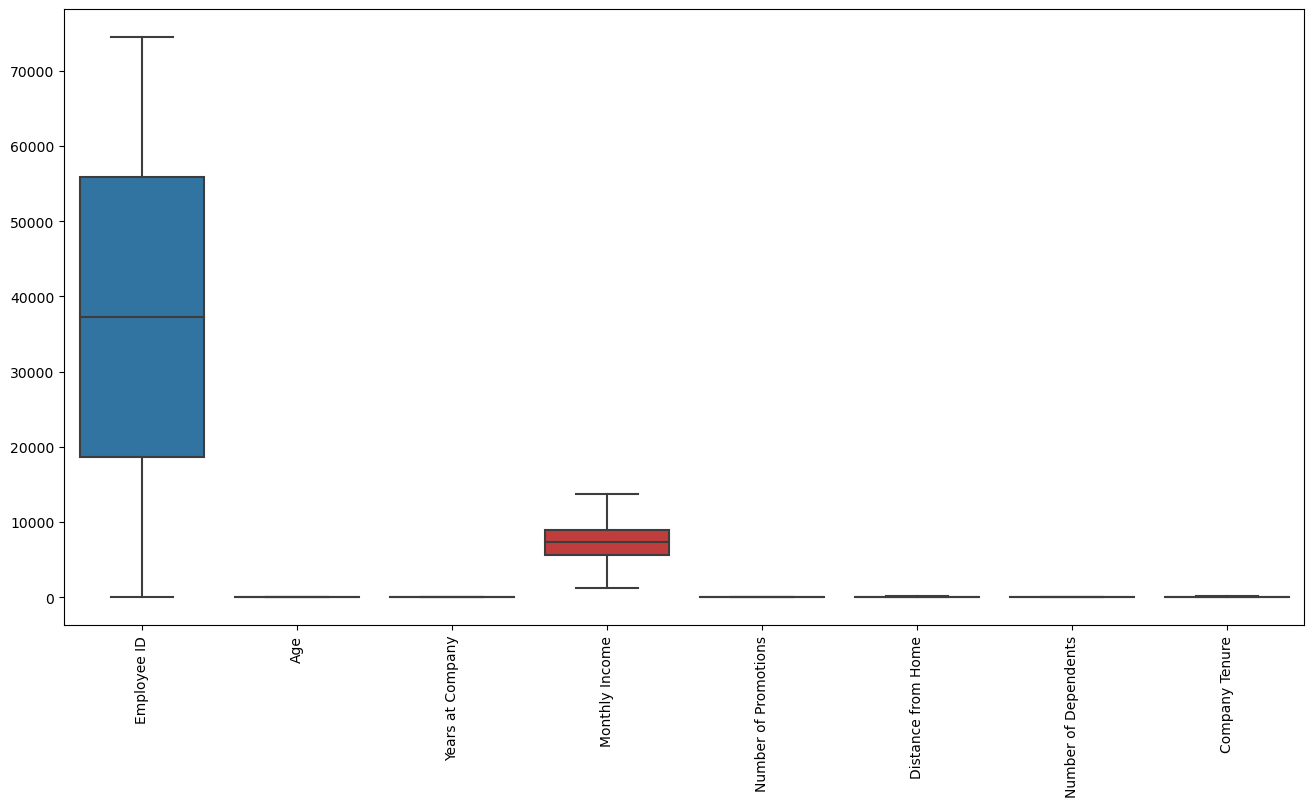

In [38]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(employee)
plt.show()

***All outliers are treated properly.***

# Feature Engineering

### Make Employee ID as index column

Since 'Employee ID' has full of unique values, make it as index column

In [39]:
employee.set_index('Employee ID',inplace=True)

### Label Encoding

Do label encoding in order to convert all categorical features into numerical features

In [40]:
categorical_columns=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level',
                     'Marital Status','Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities',
                     'Company Reputation','Employee Recognition','Attrition']                
le=LabelEncoder()
for i in categorical_columns:
    employee[i]=le.fit_transform(employee[i])
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 8410 to 73042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  int32  
 2   Years at Company          74498 non-null  int64  
 3   Job Role                  74498 non-null  int32  
 4   Monthly Income            74498 non-null  int64  
 5   Work-Life Balance         74498 non-null  int32  
 6   Job Satisfaction          74498 non-null  int32  
 7   Performance Rating        74498 non-null  int32  
 8   Number of Promotions      74498 non-null  float64
 9   Overtime                  74498 non-null  int32  
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  int32  
 12  Marital Status            74498 non-null  int32  
 13  Number of Dependents      74498 non-null  float64
 14  Job Leve

***All categorical features are converted to numerical features.***

### Seperating the target (y) and independent variables (x)

In [41]:
x=employee.drop('Attrition',axis=1)
y=employee['Attrition'].values.reshape(-1,1)

### Standard scaling x data

In [42]:
sc=StandardScaler()
x=sc.fit_transform(x)

### Train test split

Take test size as 0.2 since the size of dataset is medium

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Modelling

## K Fold Cross Validation

Since the data is not imbalanced, use k fold cross validation technique

In [44]:
kfold_validator=KFold(10,shuffle=True,random_state=42)

### Logistic Regression

In [45]:
log_reg=LogisticRegression()
cv_result_log_reg=cross_val_score(log_reg,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Logistic Regression Model:', cv_result_log_reg.mean())

Average cross validation score of Logistic Regression Model: 0.7113324186189521


### Decision Tree

In [46]:
dt_clf=DecisionTreeClassifier()
cv_result_dt_clf=cross_val_score(dt_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Decision Tree Model:', cv_result_dt_clf.mean())

Average cross validation score of Decision Tree Model: 0.6596866422792889


### Random Forest

In [47]:
rf_clf=RandomForestClassifier()
cv_result_rf=cross_val_score(rf_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Random Forest Model:', cv_result_rf.mean())

Average cross validation score of Random Forest Model: 0.7423739203348159


### KNN

In [48]:
knn=KNeighborsClassifier()
cv_result_knn=cross_val_score(knn,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of KNN Model:', cv_result_knn.mean())

Average cross validation score of KNN Model: 0.6661968529920902


## Comparison Between Different Classification Models

In [49]:
model=['Logistic Regression','Decision Tree','Random Forest','KNN']
comp_table= pd.DataFrame([[cv_result_log_reg.mean()],[cv_result_dt_clf.mean()],[cv_result_rf.mean()],[cv_result_knn.mean()]],columns=['Average Cross Validation Score'])
comp_table.index=model
comp_table

,Average Cross Validation Score
Logistic Regression,0.711332
Decision Tree,0.659687
Random Forest,0.742374
KNN,0.666197


***Average cross validation score is high for random forest model. So select it for prediction.***

## Prediction

In [50]:
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

### Evaluation metrics

In [51]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)]],columns=['Random Forest'])
table.index=metric
table

,Random Forest
Train Accuracy,0.999966
Test Accuracy,0.749597
Precision,0.760722
Recall,0.761404
F1 Score,0.761063


***There is high difference between train and test accuracy. So model is overfitted to train data. In order to avoid overfitting, use hyperparameter tuning.***

## Hyper Parameter Tuning

In [52]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [53]:
CV_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 200}

## Prediction with Best Parameters

In [58]:
rf_clf1=RandomForestClassifier(n_estimators=200,max_depth=7,criterion='gini',max_features='log2')
rf_clf1.fit(x_train,y_train)
rf_pred1=rf_clf.predict(x_test)

### Evaluation metrics

In [59]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf1.score(x_train,y_train)],[accuracy_score(y_test,rf_pred1)],[precision_score(y_test,rf_pred1)],[recall_score(y_test,rf_pred1)],[f1_score(y_test,rf_pred1)]],columns=['Random Forest with Best Parameters'])
table.index=metric
table

,Random Forest with Best Parameters
Train Accuracy,0.747827
Test Accuracy,0.749597
Precision,0.760722
Recall,0.761404
F1 Score,0.761063


***Now train accuracy got reduced and there is no much difference between train and test accuracy. So overfitting avoided. Also test accuracy is slightly higher than train accuracy. So model performs well on unseen data.***

### Confusion Matrix and Classification Report

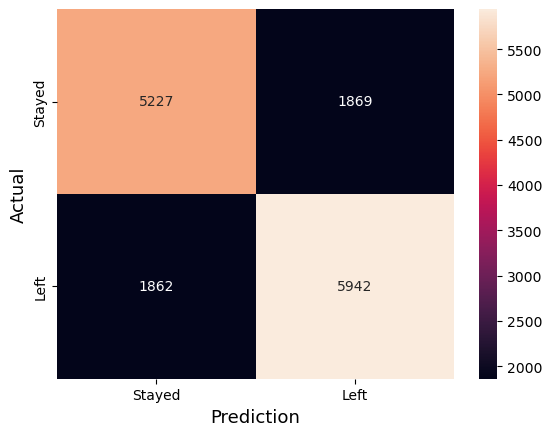

In [60]:
cm = confusion_matrix(y_test,rf_pred1)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Stayed','Left'],
            yticklabels=['Stayed','Left'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.show()

In [61]:
print(classification_report(y_test,rf_pred1))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7096
           1       0.76      0.76      0.76      7804

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



***Metric values are good. So model is satisfactory.***